In [ ]:
!pip install galpy
!pip install astroquery
#!pip install gala

     |████████████████████████████████| 6.0MB 7.9MB/s 
     |████████████████████████████████| 3.9MB 8.6MB/s 
     |████████████████████████████████| 808kB 30.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 3.2MB 25.5MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp37-none-any.whl size=3864 sha256=ad41558b7f5ed55d7a6c41f037beaee508529a3fc56e05f8c79faa0bce8d126b
  Stored in directory: /root/.cache/pip/wheels/54/ca/c7/3db47cc5c748286db22a7fab43ccf985903d2b9ca119de16ab
Successfully built mimeparse


In [ ]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math
from astropy import units as u
import astropy.coordinates as astcoord
from galpy.potential import KeplerPotential
#from galpy.util.bovy_conversion import get_physical
from galpy import orbit
from galpy.potential import KuzminKutuzovStaeckelPotential
from galpy.actionAngle import actionAngleSpherical
from galpy.actionAngle import UnboundError


In [ ]:
# initialize constants
G = 6.67e-11
M = 1.98e30
P = 60*60*24*365
deltaP = P*0.1
# Define the distance a to be 8 kiloparsecs in SI units
a = 8*3.086e19
# the amplitude of the spread in positions - adjust this keeping in mind bad
# angles in the action-angle computation
deltaa = a/80

In [ ]:
# create x,y,z arrays
x = []
y = []
z = []
size = 2000

# intialize times b/w 0 to a gigayear
time_list = 1e9*random.rand(size)

# intialize other coordinates with their spreads
theta = 2*math.pi*random.rand(size)
R = deltaa*(random.rand(size)) +a
x = R*np.cos(theta)
y = R*np.sin(theta)

z = deltaa*(random.rand(size))

# Add spread in velocities
v_theta = 220000*np.ones(len(x)) + 11000*(2*np.random.rand(len(x))-1)
v_r = np.zeros(len(v_theta))
v_z = np.zeros(len(v_theta))

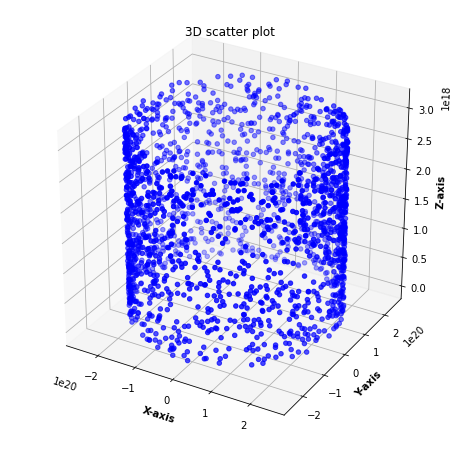

In [ ]:
# visualize initial positions in 3D cartesian
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "blue")
plt.title("3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
 
# show plot
plt.show()

# Orbit Integration

1.4559862664296623

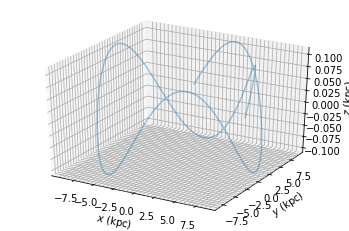

In [ ]:
# Orbit of sun to get estimated delta (focal length for action angle calc)
from galpy.actionAngle import estimateDeltaStaeckel
from galpy.potential import MWPotential2014
# Initialize orbit, integrate over the period and plot

#o = orbit.Orbit([R*u.m, v_r*u.m/u.s, v_theta*u.m/u.s, z*u.m, v_z*u.m/u.s, theta*u.rad])

# This initializes the SUN
o = orbit.Orbit()
ts= np.linspace(0.,60*60*24*365*10,9001)*u.year
o.integrate(ts, MWPotential2014)

o.plot3d(alpha=0.4)
estimateDeltaStaeckel(MWPotential2014, o.R(ts), o.z(ts))
#o.plot(d1='x',d2='y')


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib
/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



In [ ]:
# Initialize orbit, integrate over the period and plot
# Loop to initialize different end times for the orbit evolution
oR = []
oz = []
ophi = []
ovR = []
ovT = []
ovz = []
# Initialize Staeckel potential
kkSP = KuzminKutuzovStaeckelPotential(amp = 1., Delta = 0.01455986266429755)
size= len(x)
for i in range(size):
  o = orbit.Orbit([R[i]*u.m, v_r[i]*u.m/u.s, v_theta[i]*u.m/u.s, z[i]*u.m, v_z[i]*u.m/u.s, theta[i]*u.rad])
  final_T = time_list[i]
  ts= np.linspace(0.,final_T,30)*u.yr
  
  o.integrate(ts, kkSP)
  oR.append(o.R(ts)[-1])
  oz.append(o.z(ts)[-1])
  ophi.append(o.phi(ts)[-1])
  ovR.append(o.vR(ts)[-1])
  ovT.append(o.vT(ts)[-1])
  ovz.append(o.vz(ts)[-1])
  

#kp= KeplerPotential(amp=G*(u.m**3)/(u.s**2*u.kg) * M*u.kg,**get_physical(o)) # Need to use **get_physical to get the ro= and vo= parameters, which differ from the default for the solar system
#o.plot3d(alpha=0.4)
#o.plot(use_physical=False)
#o.plot(d1='x',d2='y')


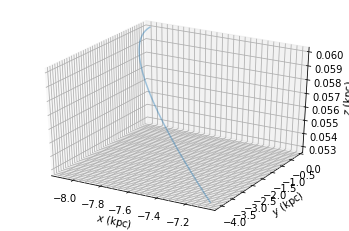

In [ ]:
o.plot3d(alpha=0.4)

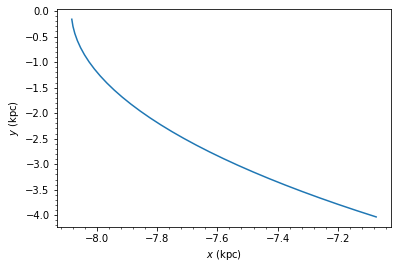

In [ ]:
#ax1=plt.subplot(1,1,1)
o.plot(d1='x',d2='y')


# Action Angle Calculation

In [ ]:
# Compute action angles in Staeckel potential
from galpy.actionAngle import actionAngleStaeckel
from galpy.potential import MWPotential2014
aAS= actionAngleStaeckel(pot=kkSP,delta=0.01455986266429755,fixed_quad=True) #c=True is the default

In [ ]:
# List of indices for 1/4, 1/2, 3/4, full orbits complete
t_temp = np.where(time_list>5e8)
t_temp2 = np.where(time_list>2.5e8)
t_temp3 = np.where(time_list>7.5e8)


t_half=t_temp[0]
t_14 = t_temp2[0]
t_34 = t_temp3[0]

In [ ]:
# Calculate full action angles
jfa = aAS.actionsFreqsAngles(oR[:]*u.kpc, ovR[:]*u.km/u.s, ovT[:]*u.km/u.s, oz[:]*u.kpc, ovz[:]*u.km/u.s, ophi[:]*u.rad, fixed_quad=True)
jfa_list = np.array(jfa)


/usr/local/lib/python3.7/dist-packages/galpy/actionAngle/actionAngleStaeckel_c.py:425: RuntimeWarning: invalid value encountered in remainder
  Anglephi[badAngle]= (Anglephi[badAngle] + phi[badAngle] % (2.*numpy.pi)) % (2.*numpy.pi)



# Prepare Points arrays to feed into voronoi code

In [ ]:
# Full orbit
import math
# Create 3D points from angles space
points = []
size = len(jfa_list[0])
for i in range(size):
  pt = [float(jfa_list[6,i]), float(jfa_list[7, i]), float(jfa_list[8, i])]
  points.append(pt)

np.savetxt('vor_points.txt', points)

In [ ]:
# 1/2 orbit
points = []
size = len(jfa_list[0])
for i in t_half:
  pt = [float(jfa_list[6,i]), float(jfa_list[7, i]), float(jfa_list[8, i])]
  points.append(pt)

np.savetxt('vor_points_half.txt', points)

In [ ]:
# 1/4 orbit
points = []
size = len(jfa_list[0])
for i in t_14:
  pt = [float(jfa_list[6,i]), float(jfa_list[7, i]), float(jfa_list[8, i])]
  points.append(pt)

np.savetxt('vor_points_14.txt', points)

In [ ]:
# 3/4 orbit
points = []
size = len(jfa_list[0])
for i in t_34:
  pt = [float(jfa_list[6,i]), float(jfa_list[7, i]), float(jfa_list[8, i])]
  points.append(pt)

np.savetxt('vor_points_34.txt', points)